In [13]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [15, 15]


2000
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]


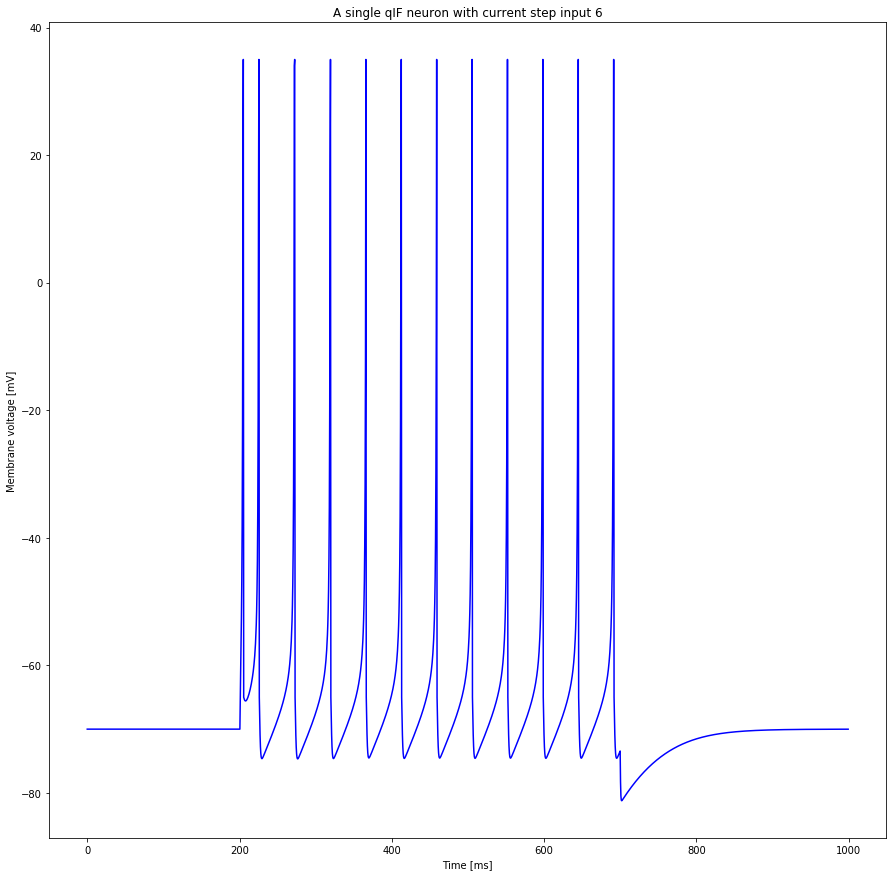

In [14]:
from pylab import *
from math import ceil
from numpy.core.multiarray import zeros, arange


tmax = 1000
dt= 0.5

a = 0.02
b = 0.2
c = -65
d=8

iapp = 10
tr = [200/dt, 700/dt]
T = ceil(tmax/dt)
print (T)
v = zeros(int(T))
print (v)
u = zeros(int(T))
print (u)
v[0] = -70
u[0] = -14

for t in arange(T-1):
    if t> tr[0] and t<tr[1]:
        i= iapp
    else:
        i=0
        
    if v[int(t)] < 35:
        dv = (0.04 * v[int(t)] + 5) * v[int(t)]+140 - u[int(t)]
        v[int(t) + 1] = v[int(t)] + (dv + i) * dt
        du = a* (b * v[int(t)] - u[int(t)])
        u[int(t) + 1] = u[int(t)] + dt*du
    else:
        v[int(t)] = 35
        v[int(t) + 1]= c
        u[ int(t) + 1] = u[int(t)] + d

figure()
tvec = arange(0, tmax, dt)
plot(tvec, v, 'b', label = 'Voltage trace')
xlabel('Time [ms]')
ylabel('Membrane voltage [mV]')
title("A single qIF neuron with current step input 6")
show()

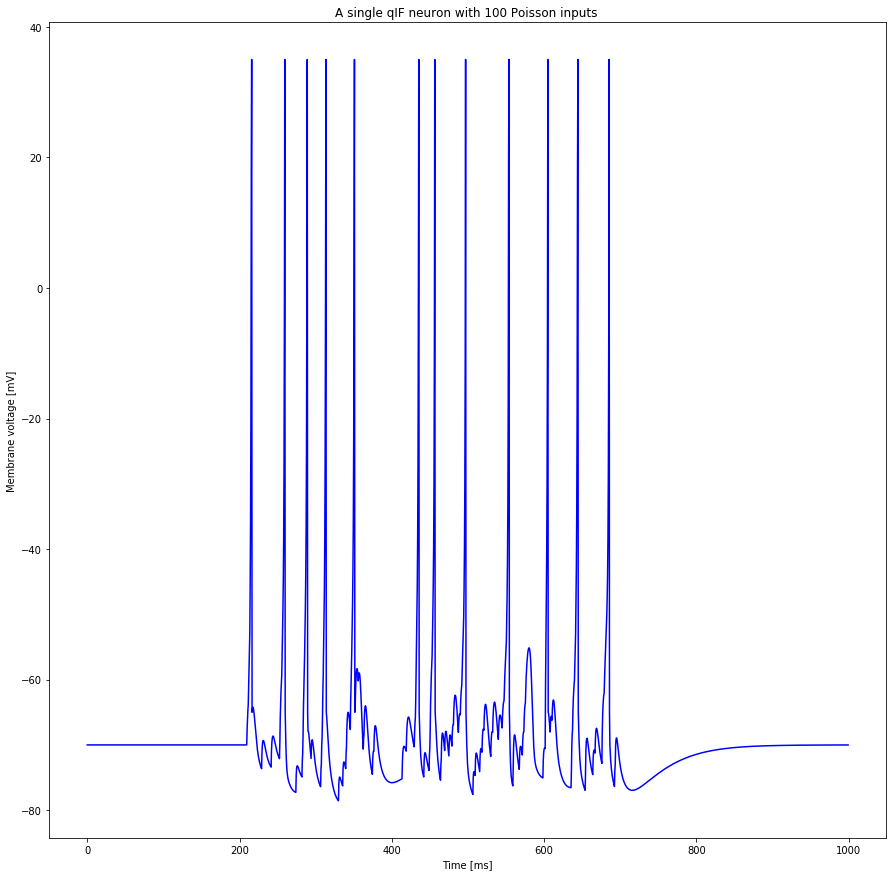

In [15]:

from pylab import *
from math import ceil
from numpy.random import uniform

# 1) initialize parameters
tmax = 1000
dt = 0.5

#1.1) Neuron / Network pars
a = 0.02
b = 0.2
c = -65
d = 8
tau_s = 10 # decay of synapses [ms]

# 1.2) Input pars
tr = ([int(200/dt), int(700/dt)])
rate_in = 2 #input rate
n_in = 100 # number of inputs
w_in = 0.07 # input weights
W_in = w_in * ones(n_in) #  vector

# 2) reserve memory 
T = ceil(tmax/dt)
v = zeros(T)
u = zeros(T)
v[0] = -70 # resting potential
u[0] = -14 # steady state
s_in = zeros(n_in) # synaptic variable
E_in = zeros(n_in) # rev potential
prate = dt*rate_in*1e-3 # abbrev

# 3) for_loop over time
for t in arange(T-1):
    # 3.1) get input
    if  t>tr[0] and t<tr[1] :
        # NEW: get input Poisson spikes
     #   print(" prate -> ", prate)
      #  print("uniform in range -> ",uniform(size = n_in)*1e-3)
        p = (uniform(size = n_in)) < prate;
      
    else:

        p = 0; # no input
     
    # NEW: calculate input current
    s_in = (1 - dt/tau_s)*s_in + p
 
    i = dot(W_in, s_in*E_in)
    i -= dot(W_in, s_in)*v[t]
    
 
    if v[t]<35:
        # 3.2) update ODE
        dv = (0.04* v[t] + 5 ) * v[t]+140 - u[t]
        v[t +1 ] = v[t] + (dv + i) *dt
        du = a *(b*v[t] - u[t])
        u[t+1] = u[t] + dt*du
    else:
        # 3.3) spike !
        v[t] = 35
        v[t+1] = c
        u[t+1] = u[t] +d
   
  
# 4) plot voltage trace
figure()
tvec = arange(0, tmax, dt)

plot(tvec,v,'b',label='Voltage trace')
xlabel('Time [ms]')
ylabel('Membrane voltage [mV]')
title("""A single qIF neuron with %d Poisson inputs """% n_in)
show()

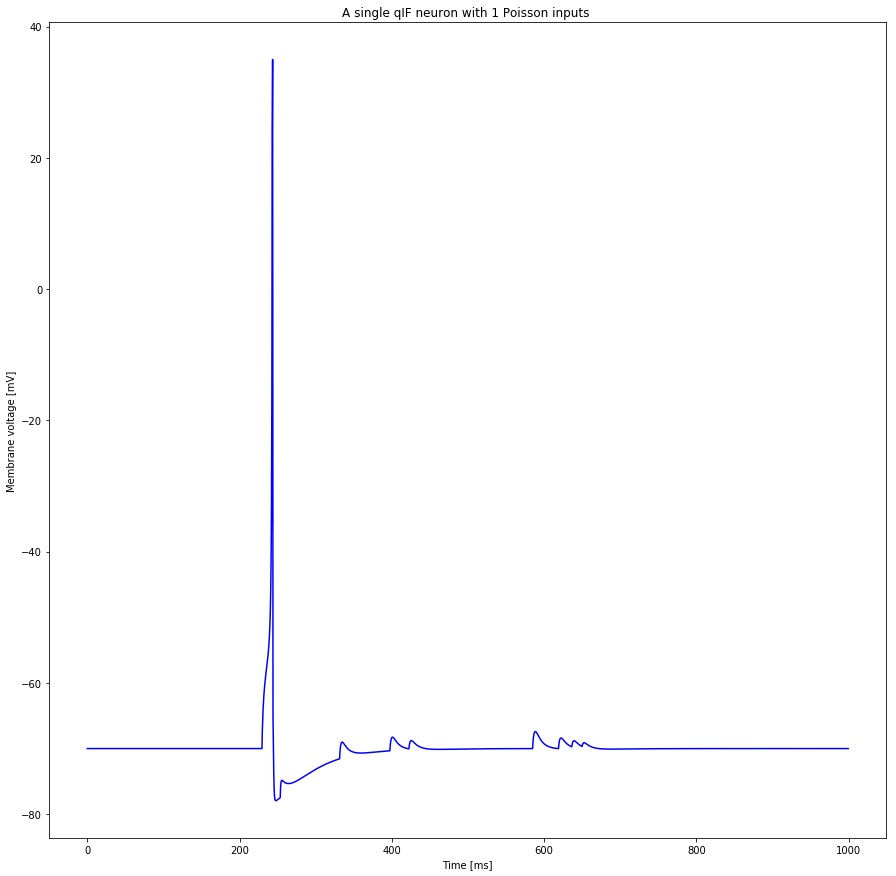

In [16]:
from pylab import *
from math import ceil
from numpy.random import uniform

# 1) initialize parameters
tmax = 1000
dt = 0.5

#1.1) Neuron / Network pars
a = 0.02
b = 0.2
c = -65
d = 8
tau_s = 10 # decay of synapses [ms]
tau_d = 500 #synaptic depression [ms]
std_u = 0.5 # STP parameter

# 1.2) Input pars
tr = ([int(200/dt), int(700/dt)])
rate_in = 10 #input rate
n_in = 1 # number of inputs
w_in = 0.08 # input weights
W_in = w_in * ones(n_in) #  vector

# 2) reserve memory 
T = ceil(tmax/dt)
v = zeros(T)
u = zeros(T)
v[0] = -70 # resting potential
u[0] = -14 # steady state
s_in = zeros(n_in) # synaptic variable
E_in = zeros(n_in) # rev potential
prate = dt*rate_in*1e-3 # abbrev
h = ones(n_in)
lastsp = -infty*ones(n_in)


# 3) for_loop over time
for t in arange(T-1):
    # 3.1) get input
    if  t>tr[0] and t<tr[1] :
        # NEW: get input Poisson spikes
     #   print(" prate -> ", prate)
      #  print("uniform in range -> ",uniform(size = n_in)*1e-3)
        p = (uniform(size = n_in)) < prate;
        
        #update synaptic depression
        tmp = exp(dt*( lastsp[p] - t)/ tau_d)
        h[p] = 1 - (1+(std_u -1) * h[p]) * tmp
        lastsp[p] = t
      
    else:

        p = 0; # no input
     
    # NEW: calculate input current
    s_in = (1 - dt/tau_s)*s_in + p*h
 
    i = dot(W_in, s_in*E_in)
    i -= dot(W_in, s_in)*v[t]
    
 
    if v[t]<35:
        # 3.2) update ODE
        dv = (0.04* v[t] + 5 ) * v[t]+140 - u[t]
        v[t +1 ] = v[t] + (dv + i) *dt
        du = a *(b*v[t] - u[t])
        u[t+1] = u[t] + dt*du
    else:
        # 3.3) spike !
        v[t] = 35
        v[t+1] = c
        u[t+1] = u[t] +d
   
  
# 4) plot voltage trace
figure()
tvec = arange(0, tmax, dt)

plot(tvec,v,'b',label='Voltage trace')
xlabel('Time [ms]')
ylabel('Membrane voltage [mV]')
title("""A single qIF neuron with %d Poisson inputs """% n_in)
show()

T ->  2000
v ->  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


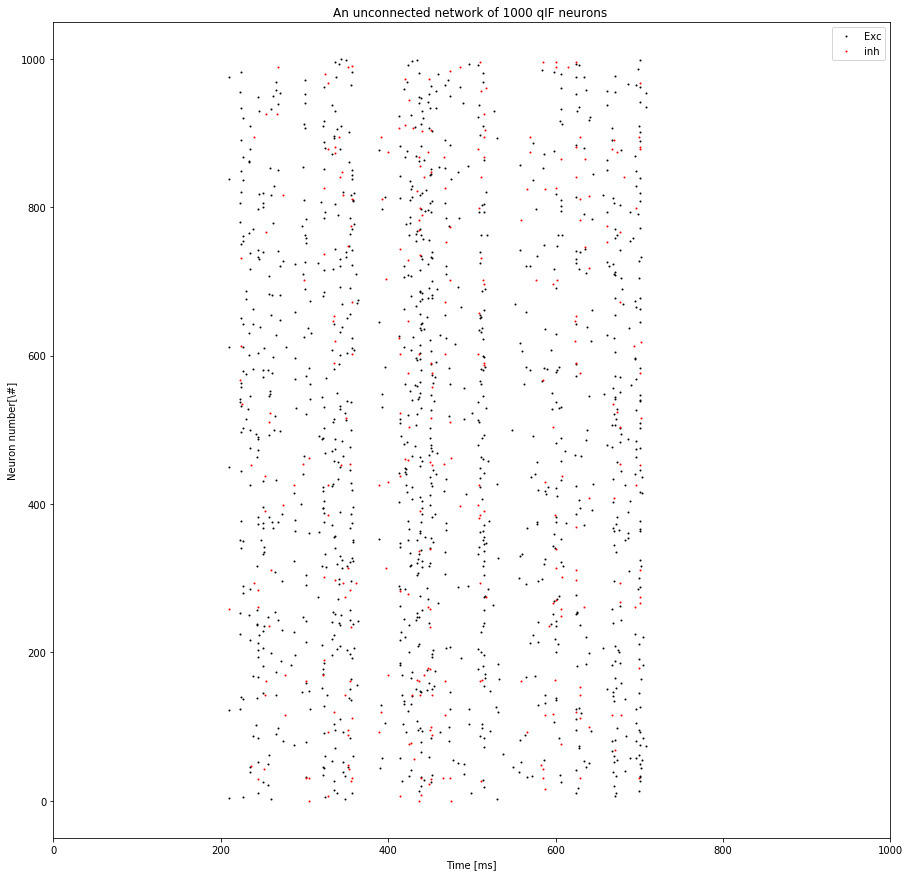

In [17]:
from pylab import *
from math import ceil
from numpy.random import uniform


# 1) initialize parameters
tmax = 1000
dt = 0.5

#1.1) Neuron / Network pars
n = 1000 # number of neurons
pinh = 0.2 #prob of inh neuron
inh = (uniform(size=n)<pinh) # whether inh.
exc = logical_not(inh)
a = inh.choose(0.02,0.1) # exc = 0.02, inh =0.1
b = 0.2
c = -65
d = inh.choose(8,2) # exc=8, inh = 2
tau_s = 10 # decay of synapses [ms]

#tau_d = 500 #synaptic depression [ms]
#std_u = 0.5 # STP parameter

# 1.2) Input pars
tr = ([int(200/dt), int(700/dt)])
rate_in = 2 #input rate
n_in = 100 # number of inputs
w_in = 0.07 # input weights
pconn_in = 0.1 #input conn prob.

C = uniform(size=(n, n_in))<pconn_in
W_in = C.choose(0, w_in) #  matrix

# 2) reserve memory 
T = ceil(tmax/dt)
print("T -> ",T)
v = zeros((T,n)) # now matrix
print("v -> ", v)
u = zeros((T,n)) # now matrix
v[0] = -70 # set 1st row
u[0] = -14 
s_in = zeros(n_in) 
E_in = zeros(n_in) 
prate = dt*rate_in*1e-3 # abbrev
#h = ones(n_in)
lastsp = -infty*ones(n_in)


# 3) for_loop over time
for t in arange(T-1):
    # 3.1) get input
    if  t>tr[0] and t<tr[1] :
        # NEW: get input Poisson spikes
        p = (uniform(size = n_in)) < prate;
        
    else:

        p = 0; # no input
     
    # NEW: calculate input current
    s_in = (1 - dt/tau_s)*s_in + p
    i = W_in.dot(s_in*E_in)
    i -= W_in.dot(s_in)*v[t]
    
    #print("v[t] -> ",v[t])
    #NEW: handle all neurons
    fired = v[t]>=35
    
    #print("fired -> ", fired)
  #  if fired:
        # 3.2) update ODE , simply update all
    dv = (0.04*v[t]+5)*v[t]+140-u[t]
    res = v[t] + (dv+i)*dt
    v[t+1] = v[t] + (dv+i)*dt
    du = a *(b*v[t] - u[t])
    u[t+1] = u[t] + dt*du
  #  else:
    # 3.3) spike !
    v[t][fired] = 35
    v[t+1][fired] = c
    u[t+1][fired] = u[t][fired] +d[fired]
   
  
# 4) plot voltage trace
# NEW: get spikes and plot
tspk, nspk =  nonzero(v == 35)
idx_i = in1d(nspk,nonzero(inh)[0]) # find inh
idx_e = logical_not(idx_i) # all others are exc

figure()
#tvec = arange(0, tmax, dt)
plot(tspk[idx_e]*dt,nspk[idx_e],'k.', label = 'Exc', markersize = 2)
plot(tspk[idx_i]*dt, nspk[idx_i],'r.', label = 'inh', markersize = 2)
#plot(tvec,v,'b',label='Voltage trace')
xlabel('Time [ms]')
ylabel('Neuron number[\#]')
xlim((0,tmax))
title("""An unconnected network of %d qIF neurons """% n)
legend(loc='upper right')
show()


T ->  2000
v ->  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


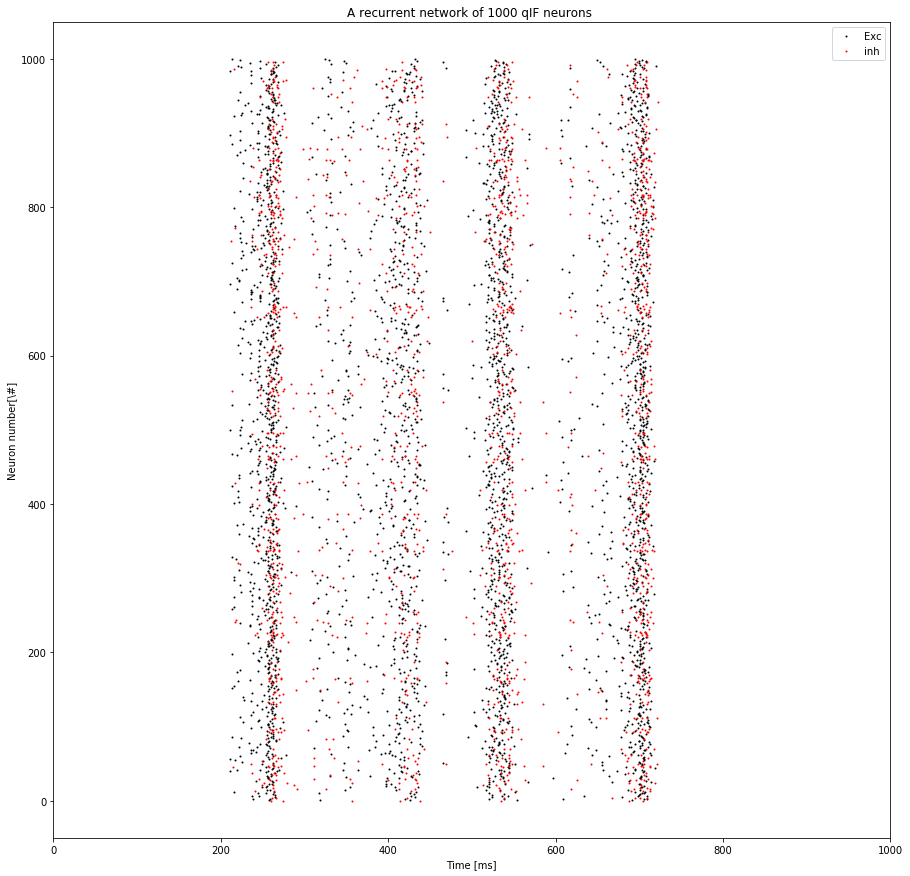

In [18]:
from pylab import *
from math import ceil
from numpy.random import uniform
from scipy.sparse import csr_matrix


# 1) initialize parameters
tmax = 1000
dt = 0.5

#1.1) Neuron / Network pars
n = 1000 # number of neurons
pinh = 0.2 #prob of inh neuron
inh = (uniform(size=n)<pinh) # whether inh.
exc = logical_not(inh)
a = inh.choose(0.02,0.1) # exc = 0.02, inh =0.1
b = 0.2
c = -65
d = inh.choose(8,2) # exc=8, inh = 2
tau_s = 10 # decay of synapses [ms]

#tau_d = 500 #synaptic depression [ms]
#std_u = 0.5 # STP parameter

#NEW recurrent parameter
w = 0.005 # average recurrent weight
pconn= 0.1 # recurrent connection prob
scaleEI = 2 # scale I->E
g_sc = 0.002 # scale of gamma
E = inh.choose(0,-85)
# NEW make weight matrix
W = zeros((n,n))
C = uniform(size = (n, n))
idx = nonzero(C<pconn) # sparse connectivity
W[idx] = gamma(w/g_sc, scale=g_sc, size=idx[0].size)
W[ix_(exc,inh)] *= scaleEI #submat indexing
W = csr_matrix(W) # make row sparse

# 1.2) Input pars
tr = ([int(200/dt), int(700/dt)])
rate_in = 2 #input rate
n_in = 100 # number of inputs
w_in = 0.07 # input weights
pconn_in = 0.1 #input conn prob.
C = uniform(size=(n, n_in))<pconn_in
W_in = C.choose(0, w_in) #  matrix

# 2) reserve memory 
T = ceil(tmax/dt)
print("T -> ",T)
v = zeros((T,n)) # now matrix
print("v -> ", v)
u = zeros((T,n)) # now matrix
v[0] = -70 # set 1st row
u[0] = -14 
s_in = zeros(n_in) 
E_in = zeros(n_in) 
prate = dt*rate_in*1e-3 # abbrev
#h = ones(n_in)
s= zeros(n) # rec synapses

#lastsp = -infty*ones(n_in)


# 3) for_loop over time
for t in arange(T-1):
    # 3.1) get input
    if  t>tr[0] and t<tr[1] :
        # NEW: get input Poisson spikes
        p = (uniform(size = n_in)) < prate;
        
    else:

        p = 0; # no input
     
    # NEW: calculate input current
    s_in = (1 - dt/tau_s)*s_in + p
    i = W_in.dot(s_in*E_in)
    i -= W_in.dot(s_in)*v[t]
    
    #print("v[t] -> ",v[t])
    #NEW: handle all neurons
    fired = v[t]>=35
    
    #print("fired -> ", fired)
    
    #NEW recurrent input
    s = (1 - dt/tau_s)*s +fired
    lsyn = W.dot(s*E) - W.dot(s)*v[t]
    i += lsyn # add to input vector
    
  #  if fired:
        # 3.2) update ODE , simply update all
    dv = (0.04*v[t]+5)*v[t]+140-u[t]
    res = v[t] + (dv+i)*dt
    v[t+1] = v[t] + (dv+i)*dt
    du = a *(b*v[t] - u[t])
    u[t+1] = u[t] + dt*du
  #  else:
    # 3.3) spike !
    v[t][fired] = 35
    v[t+1][fired] = c
    u[t+1][fired] = u[t][fired] +d[fired]
   
  
# 4) plot voltage trace
# NEW: get spikes and plot
tspk, nspk =  nonzero(v == 35)
idx_i = in1d(nspk,nonzero(inh)[0]) # find inh
idx_e = logical_not(idx_i) # all others are exc

figure()
#tvec = arange(0, tmax, dt)
plot(tspk[idx_e]*dt,nspk[idx_e], 'k.', label = 'Exc', markersize = 2)
plot(tspk[idx_i]*dt, nspk[idx_i],'r.', label = 'inh', markersize = 2)
#plot(tvec,v,'b',label='Voltage trace')
xlabel('Time [ms]')
ylabel('Neuron number[\#]')
xlim((0,tmax))
title("""A recurrent network of %d qIF neurons """% n)
legend(loc='upper right')
show()

W_in ->  [[0.   0.   0.07 ... 0.   0.07 0.  ]
 [0.   0.   0.   ... 0.07 0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]
 ...
 [0.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.  ]
 [0.07 0.   0.   ... 0.   0.07 0.  ]]
T ->  2000
v ->  [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


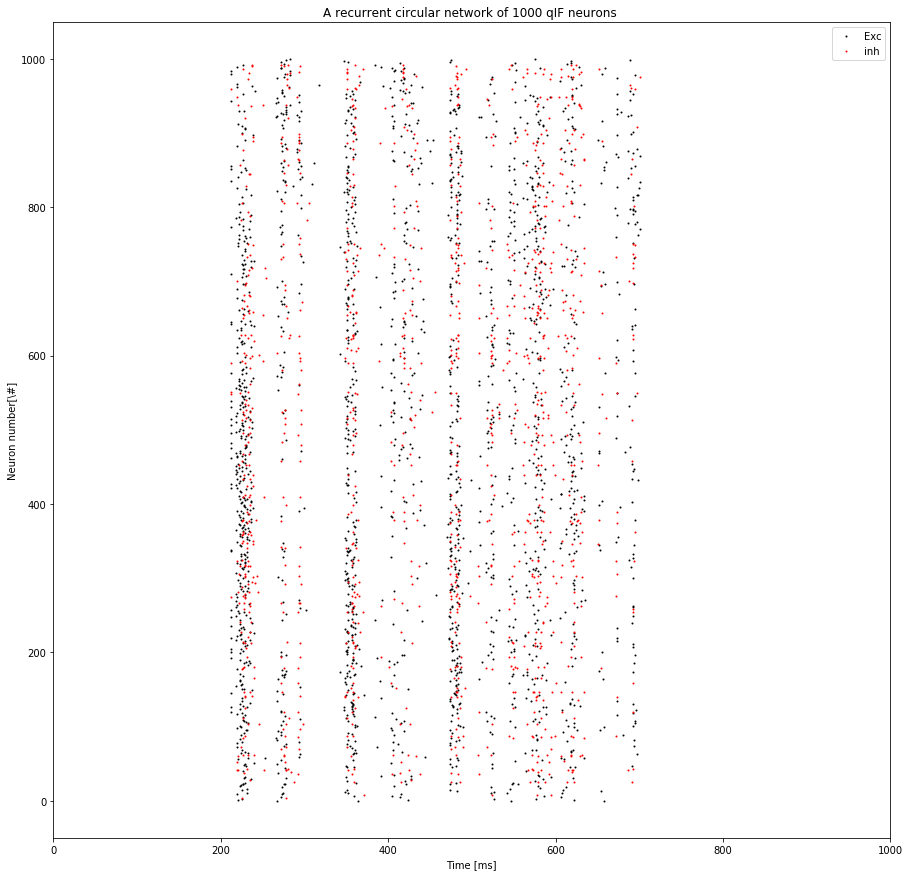

In [19]:
from pylab import *
from math import ceil
from numpy.random import uniform
from scipy.sparse import csr_matrix
from scipy.linalg.special_matrices import circulant


# 1) initialize parameters
tmax = 1000
dt = 0.5

#1.1) Neuron / Network pars
n = 1000 # number of neurons
pinh = 0.2 #prob of inh neuron
inh = (uniform(size=n)<pinh) # whether inh.
exc = logical_not(inh)
a = inh.choose(0.02,0.1) # exc = 0.02, inh =0.1
b = 0.2
c = -65
d = inh.choose(8,2) # exc=8, inh = 2
tau_s = 10 # decay of synapses [ms]

#tau_d = 500 #synaptic depression [ms]
#std_u = 0.5 # STP parameter

#NEW recurrent parameter
width = pi/4 # half-width of the orientation tuning
w = 0.005 # average recurrent weight
pconn= 0.4 #set a bit higher
scaleEI = 2 # scale I->E
g_sc = 0.002 # scale of gamma
E = inh.choose(0,-85)
# NEW make weight matrix
W = zeros((n,n))
C = uniform(size = (n, n))
idx = nonzero(C<pconn) # sparse connectivity
W[idx] = gamma(w/g_sc, scale=g_sc, size=idx[0].size)
W[ix_(exc,inh)] *= scaleEI #submat indexing
theta = linspace(0, 2*pi, n) #NEW
R = circulant(cos(theta))>cos(width) #NEW
W[:,exc] = where(R[:,exc], W[:,exc],0)#NEW
W = csr_matrix(W) # make row sparse

# 1.2) Input pars
tr = ([int(200/dt), int(700/dt)])
rate_in = 2 #input rate
inwidth = pi/2
w_in = 0.07 # input weights
pconn_in = 0.2 #input conn prob.
n_in = 100 # number of inputs
C = uniform(size=(n, n_in))<pconn_in
W_in = C.choose(0, w_in) #  matrix
print("W_in -> ", W_in)
W_in[int(n/2),:]=0 #NEW

# 2) reserve memory 
T = ceil(tmax/dt)
print("T -> ",T)
v = zeros((T,n)) # now matrix
print("v -> ", v)
u = zeros((T,n)) # now matrix
v[0] = -70 # set 1st row
u[0] = -14 
s_in = zeros(n_in) 
E_in = zeros(n_in) 
prate = dt*rate_in*1e-3 # abbrev
#h = ones(n_in)
s= zeros(n) # rec synapses

#lastsp = -infty*ones(n_in)


# 3) for_loop over time
for t in arange(T-1):
    # 3.1) get input
    if  t>tr[0] and t<tr[1] :
        # NEW: get input Poisson spikes
        p = (uniform(size = n_in)) < prate;
        
    else:

        p = 0; # no input
     
    # NEW: calculate input current
    s_in = (1 - dt/tau_s)*s_in + p
    i = W_in.dot(s_in*E_in)
    i -= W_in.dot(s_in)*v[t]
    
    #print("v[t] -> ",v[t])
    #NEW: handle all neurons
    fired = v[t]>=35
    
    #print("fired -> ", fired)
    
    #NEW recurrent input
    s = (1 - dt/tau_s)*s +fired
    lsyn = W.dot(s*E) - W.dot(s)*v[t]
    i += lsyn # add to input vector
    
  #  if fired:
        # 3.2) update ODE , simply update all
    dv = (0.04*v[t]+5)*v[t]+140-u[t]
    res = v[t] + (dv+i)*dt
    v[t+1] = v[t] + (dv+i)*dt
    du = a *(b*v[t] - u[t])
    u[t+1] = u[t] + dt*du
  #  else:
    # 3.3) spike !
    v[t][fired] = 35
    v[t+1][fired] = c
    u[t+1][fired] = u[t][fired] +d[fired]
   
  
# 4) plot voltage trace
# NEW: get spikes and plot
tspk, nspk =  nonzero(v == 35)
idx_i = in1d(nspk,nonzero(inh)[0]) # find inh
idx_e = logical_not(idx_i) # all others are exc

figure()
#tvec = arange(0, tmax, dt)
plot(tspk[idx_e]*dt,nspk[idx_e], 'k.', label = 'Exc', markersize = 2)
plot(tspk[idx_i]*dt, nspk[idx_i],'r.', label = 'inh', markersize = 2)
#plot(tvec,v,'b',label='Voltage trace')
xlabel('Time [ms]')
ylabel('Neuron number[\#]')
xlim((0,tmax))
title("""A recurrent circular network of %d qIF neurons """% n)
legend(loc='upper right')
show()

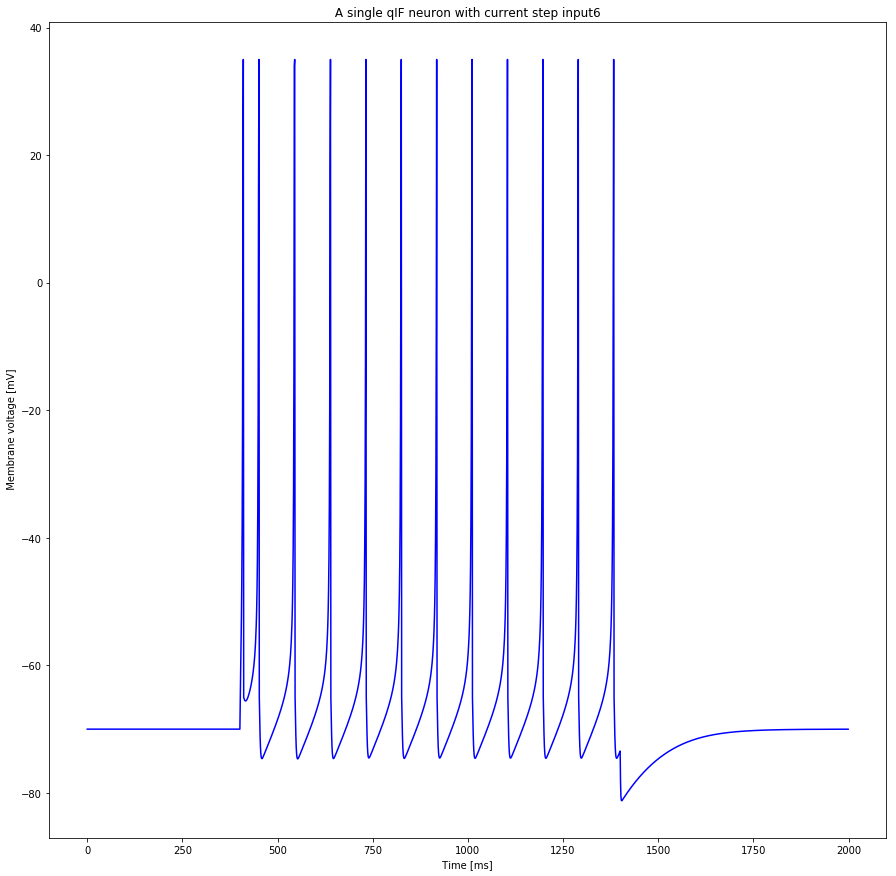

In [20]:
import pylab
import math
import numpy as np
import matplotlib.pyplot as plt


#http://www.mjrlab.org/wp-content/uploads/2014/05/network_python_tutorial2013.pdf

# initialize parameters
tmax = 1000
dt = 0.5

# Neuron / network pars
a = 0.02 # RS , IB : 0. 0 2 , FS : 0. 1
b = 0.2 # RS , IB , FS : 0. 2
c = -65 # RS , FS : −65 IB : −55
d=8 # RS : 8 , IB : 4 , FS : 2

# Input pars
iapp=10
tr = [200/dt , 700/dt] # stm time

#reserve memory
T = math.ceil(tmax/dt)
v = np.zeros(T)
u = np.zeros(T)
v[0] = -70 #resting potential
u[0] = -14 # steady state

for t in range(T -1):
    if t > tr[0] and t < tr[1]:
        i = iapp
    else:
        i = 0

    if  ( v[ t ] < 35):
        # update ODE
        dv = ( 0.04 * v[ t ] + 5 ) * v[t] + 140 -u[ t ]
        v[ t +1 ] = v[ t ] + ( dv + i )* dt
        du = a * ( b*v[ t ]  - u [ t ] )
        u[ t + 1 ] = u [ t ] + dt * du
    else:
        # spike !
        v [ t ] = 35
        v[ t + 1 ] = c
        u[ t +1 ] = u[ t ] + d
        
plt.figure()
tvec  = np.arange(0, tmax/dt)
plt.plot( tvec, v, 'b', label = 'Voltage trace')
plt.xlabel( ' Time [ms] ' )
plt.ylabel( '  Membrane voltage [mV] ' )
plt.title ( " A single qIF neuron with current step input6 ")
plt.show()

 prate ->  0.001
 n_in ->  100
 p ->  0
0.0


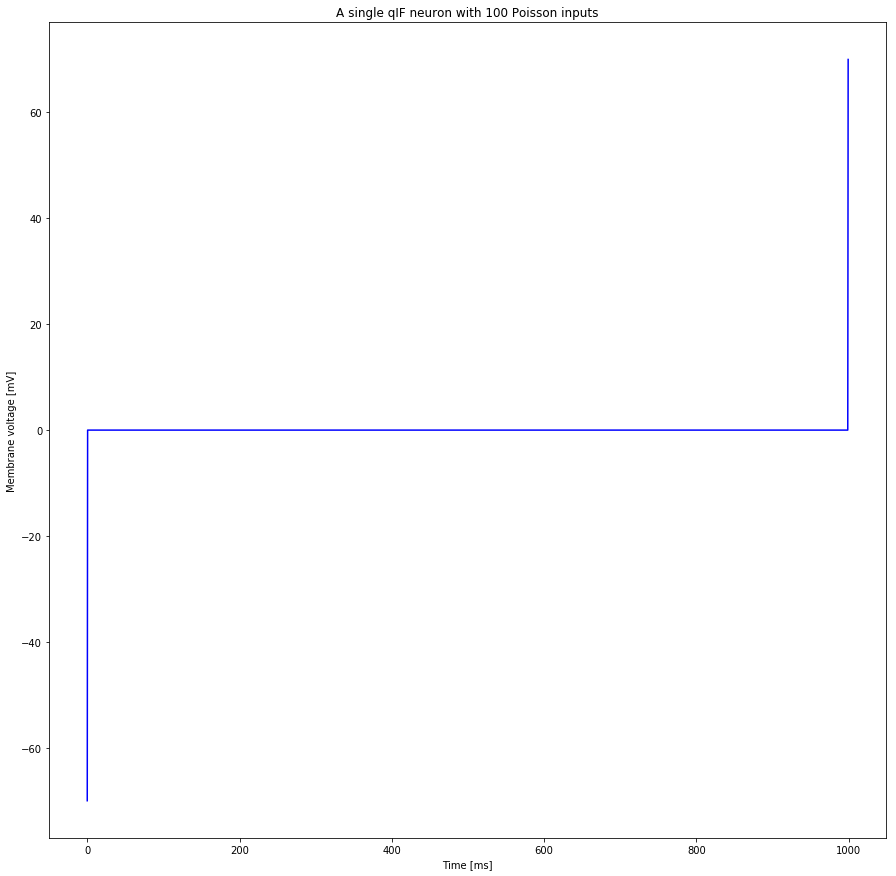

In [21]:
from pylab import * 
import math
import numpy as np
import matplotlib.pyplot as plt
import random as ra
from scipy.sparse import csr_matrix
from numpy.random import uniform
#http://www.mjrlab.org/wp-content/uploads/2014/05/network_python_tutorial2013.pdf
tmax = 1000
dt = 0.5

a = 0.02
b = 0.2
c = -65
d = 8
tau_s = 10
tr = [  200/dt, 700/dt  ]
rate_in = 2
n_in = 100
w_in = 0.07
W_in = w_in* np.ones( n_in )

T = math.ceil( tmax/ dt )
v = np.zeros ( T )
u = np.zeros ( T )

v[ 0 ] = -70
u[ 0 ] = -14

s_in = np.zeros ( n_in )
E_in = np.zeros ( n_in )
prate = dt * rate_in * 1e-3

print(" prate -> ", prate)
print(" n_in -> ", n_in)
#print("ran uniform -> " ,uniform(size=n_in))

h = np.ones(n_in)
lastsp = -np.infty * np.ones( n_in)

for t in np.arange(T-1):
    if t > tr[ 0 ] and t < tr [ 1 ]:
        p = uniform(size = n_in ) < prate;
       
    else:
        p = 0;

print(" p -> ", p)

s_in = ( 1 - dt / tau_s )* s_in + p
i = np.dot(W_in, s_in*E_in)
i -= np.dot(W_in, s_in)*v[ t ]

print(v[ t ])

if v[ t ] < 35:
    dv = (0.04*v[ t ] +5 ) *v[ t ]+140 -u[ t ]
    v[ t+1 ] = v[ t ] + ( dv + i) * dt
    du = a * (b * v[ t ] - u[ t ])
    u[ t + 1] = u [ t ] + dt*du
else :
    v[ t ] = 35
    v[ t + 1] = c
    u[ t + 1] = u[t]+d

figure()
tvec = arange(0, tmax, dt)
plot(tvec,v,'b', label = 'Voltage trace')
xlabel('Time [ms]')
ylabel('Membrane voltage [mV]')
title("A single qIF neuron with %d Poisson inputs"% n_in)
show()

In [1]:

import numpy as np

"""
Basic neuron model with shared instantiation
"""


class Neuron:
    def __init__(self, weights=0):
        np.seterr(all='ignore')
        self.min_potential=-65
        self.input = 0
        self.value = self.min_potential
        self.output = 0
        self.threshold = 35
        self.fired = False
        self.potential = self.min_potential
        self.weights = np.array([self.init_weight(weights) for x in range(weights)], dtype='float64')

    def fire(self):
        self.fired = True if (self.value > self.threshold) else False
        if self.fired:
            self.value = self.min_potential
            self.potential = self.min_potential
        return 1 if self.fired else 0

    def init_weight(self, num_weights):
        # return np.random.uniform(-(2 / num_weights), (2 / num_weights))
        return 1

    def solve(self):
        raise NotImplementedError("A neuron model needs a solve method")


"""
Leaky Integrate and Fire neuron model
"""


class LeakyIntegrateAndFireNeuron(Neuron):
    def __init__(self, weights=0):
        super(self.__class__, self).__init__(weights)
        self.degradation = 0.99
        self.refractoryTime = 0
        self.defaultRefractory = 10

    def calculate_potential(self, inputs):
        change = (self.potential - self.min_potential)* (1-self.degradation)
        self.potential = (self.potential ) - change + np.sum(np.multiply(inputs, self.weights))
        return self.potential

    def solve(self, inputs):
        self.inputs = inputs
        if self.refractoryTime > 0:
            self.refractoryTime = self.refractoryTime - 1
        else:
            self.value = self.calculate_potential(inputs)
        self.fire()
        if self.fired: self.refractoryTime = self.defaultRefractory
        return self.fired


In [2]:
from pylab import *
from math import ceil
from numpy.core.multiarray import zeros, arange

def bir():
    tmax = 1000
    dt= 0.5

    a = 0.01
    b = 0.2
    c = -65

    d=8

    iapp = 10
    tr = [200/dt, 700/dt]
    T = ceil(tmax/dt)
    print (T)
    v = zeros(int(T))
    print (v)
    u = zeros(int(T))
    print (u)
    v[0] = -70
    u[0] = -14

    in_voltage = [0]
    fire = [50]
    
    for t in arange(T-1):
        if t> tr[0] and t<tr[1]:
            i= iapp
        else:
            i=0
        in_voltage.append(i)
        if v[int(t)] < 35:
            dv = (0.04 * v[int(t)] + 5) * v[int(t)]+140 - u[int(t)]
            v[int(t) + 1] = v[int(t)] + (dv + i) * dt
            du = a* (b * v[int(t)] - u[int(t)])
            u[int(t) + 1] = u[int(t)] + dt*du
            fire.append(50)
        else:
            v[int(t)] = 35
            v[int(t) + 1]= c
            u[ int(t) + 1] = u[int(t)] + d
            fire.append(60)

    figure()
    tvec = arange(0, tmax, dt)
    plot(tvec, v, 'b', label = 'Voltage trace')
    plot(tvec,in_voltage, 'r', label="input Voltage")
    plot(tvec,fire, 'g', label="FIRE")
    xlabel('Time [ms]')
    ylabel('Membrane voltage [mV]')
    title("A single qIF neuron with current step input 6")
    plt.legend()
    show()


In [3]:

def iki():
    N = 1
    l = LeakyIntegrateAndFireNeuron(1)

    tmax = 1000
    dt = 0.5
    T = ceil(tmax / dt)
    tr = [300 / dt, 700 / dt]
    iapp = 1.1

    in_voltage = [0]
    out_voltage = [-65]
    fire= [50]
    for t in arange(T - 1):
        if t > tr[0] and t < tr[1]:
            i = iapp
        else:
            i = 0
        in_voltage.append(i)
        l.solve([i])
        out_voltage.append(l.potential)
        if(l.fired ):
            fire.append(60)
        else:
            fire.append(50)

    figure()
    tvec = arange(0, tmax, dt)
    plot(tvec, out_voltage, 'b', label='Voltage trace')
    plot(tvec, in_voltage, 'r', label="input Voltage")
    plot(tvec, fire, 'g', label="FIRE")
    xlabel('Time [ms]')
    ylabel('Membrane voltage [mV]')
    title("A single qIF neuron with current step input 6")
    plt.legend()
    show()


# Karsilastirm

2000
[0. 0. 0. ... 0. 0. 0.]
[0. 0. 0. ... 0. 0. 0.]


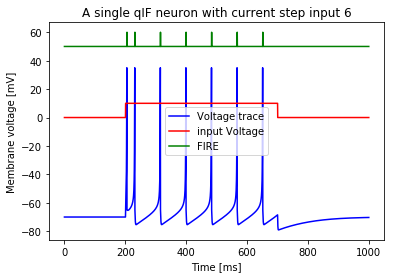

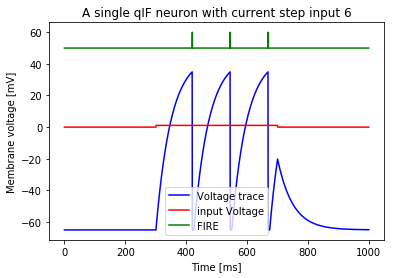

In [4]:


    
    
bir()
    
iki()
    

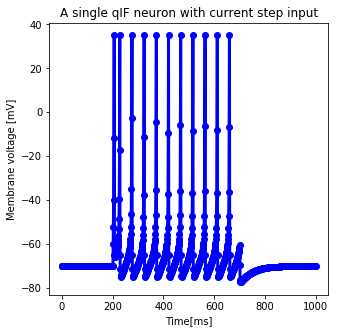

FIN


In [72]:
# -*- coding: utf-8 -*-
"""
Created on Mon Apr 25 11:47:11 2016

@author: arthur

Izhikevich neuron - Original.
"""
from __future__ import print_function
from math import modf
import numpy as np
import re

#Applies to complement to a given binary string.
def twoComplement(val):
    #Create array to store values. Type integer.
    val2 = np.zeros(len(val), dtype=int)
    #Invert bit value.
    for i in range(0, len(val)):
        if val[i] == '0':
            val2[i] = '1'
        else:
            val2[i] = '0'
    #Join values.
    res = ''.join(map(str, val2))
    #Add one as indicated by 2 complement.
    res2 = addNumber(res, 1)
    return res2
    
#Adds a binary value to a binary string.
#Currently only adds +1.
def addNumber(val, amount):
    addFlag = 1
    res = ""
    #Iterate from end of string to beginning.
    for i in range(len(val)-1, -1, -1):
        #If  there's no number to add.
        if addFlag == 0:
            res = val[i] + res
        else:
            if val[i] == '0':
                #Add +1.
                res = '1' + res
                #Stop adding.
                addFlag = 0
            else:
                #Add +1 and continue adding.
                res = '0' + res
    return res

#Converts fractional part to binary string representation.    
def float2bin(val, bits):
    val = 0.25
    initValue = 1
    stopFlag = 0
    res = ""
    for i in range(0, bits):
        if((val - initValue/2.0) == 0):
            res += '1'
            stopFlag = 1
        elif((val - initValue/2.0) > 0)and(stopFlag == 0):
            res += '1'
        else:
            res += '0'
        initValue = initValue/2.0
    return res

#Converts a floating point number into a binary string.
def conv2bin(val, bits):
    res = 0
    #Split number in integer and fractional part.
    num = modf(val)
    #Convert integer part into binary U(16,16) string.
    intPart = '{0:16b}'.format(int(num[1]))
    #If integer is negative...
    if '-' in intPart:
        intPart = re.sub(r"\W", '0', intPart)
        #...apply Two-Complement.
        intPart = twoComplement(intPart)
    else:
        intPart = re.sub(r"\W", '0', intPart)
    #Convert floating part into binary U(16,16) string.
    floatPart = float2bin(num[0], 16)
    res = intPart + floatPart
    return res
    

from pylab import *

#0)File writing.
fname = "voltage.txt"
fname1 = "voltageTranslated.txt"

#1) Initialize parameters.
dt = 1
tmax = 1000

#1.1) Neuron/Network pairs.
a = 0.02
b = 0.2
c = -65
d = 8

#1.2) Input pairs
lapp = 10
tr = array([200, 700])/dt  #stm time
 
#2) Reserve memory
T = int(tmax / dt)
v = zeros(T)
u = zeros(T)
v[0] = -70 #Resting potential
u[0] = -14 #Steady state

binArray = np.zeros(T, dtype=object)

#Open text file.
f = open(fname, "w")
f1 = open(fname1, "w")
 
#3) For-loop over time.
for t in arange(T-1):
#3.1) Get input.
    if t > tr[0] and t < tr[1]:
        l = lapp
    else:
        l = 0
    if v[t] < 35:
        #3.2) Update DOE.
        dv = (0.04*v[t]+5)*v[t]+140-u[t]
        v[t+1] = v[t]+(dv+l)*dt
        du = a*(b*v[t]-u[t])
        u[t+1] = u[t] + dt*du
        #u[t+1] = b*v[t]
    else:
        #3.3) Spike!
        v[t] = 35
        v[t+1] = c
        u[t+1] = u[t] + d
        
    #Save neuron voltage value as binary chain.
    binArray[t] = conv2bin(v[t], 32)
    #print(binArray[t])
    #print(v[t+1])
    #Write to file.
    f.write(binArray[t] + "\n")
    f1.write(str(v[t]) + "\n")

#Close file.    
f.close
f1.close

#4) Plot voltage trace
#figure(1)
#tvec = arange(0, tmax, dt)
#plot(tvec, v, 'b', label='Voltage trace', linewidth=3.0)
#xlabel('Time[ms]')
#ylabel('Membrane voltage [mV]')
#title('A single qIF neuron with current step input')
#show()

figure(2)
tvec = arange(0, tmax, dt)
plot(tvec, v, 'bo-', label='Voltage trace', linewidth=3.0)
#plot(tvec, u, 'go-', label='Recovery value', linewidth=3.0)
xlabel('Time[ms]')
ylabel('Membrane voltage [mV]')
title('A single qIF neuron with current step input')
show()
        
print("FIN")

In [2]:
"""
A population of integrate-and-firing neurons with different input firing rates
"""

import numpy as np
import matplotlib.pyplot as plt
import pyNN.spiNNaker as sim


sim.setup(timestep=1.0, min_delay=1.0)

# create cells
cell_params = {
    'cm': 0.25, 'tau_m': 10.0, 'tau_refrac': 2.0,
    'tau_syn_E': 2.5, 'tau_syn_I': 2.5,
    'v_reset': -70.0, 'v_rest': -65.0, 'v_thresh': -55.0}

neurons = sim.Population(100, sim.IF_cond_exp(**cell_params))
inputs = sim.Population(100, sim.SpikeSourcePoisson(rate=0.0))

# set input firing rates as a linear function of cell index
input_firing_rates = np.linspace(0.0, 1000.0, num=inputs.size)
inputs.set(rate=input_firing_rates)

# create one-to-one connections
wiring =  sim.OneToOneConnector()
static_synapse = sim.StaticSynapse(weight=0.1, delay=2.0)
connections = sim.Projection(inputs, neurons, wiring, static_synapse)

# configure recording
neurons.record('spikes')

# run simulation
sim_duration = 10.0 # seconds
sim.run(sim_duration * 1000.0)

# retrieve recorded data
spike_counts = neurons.get_spike_counts()
print(spike_counts)
output_firing_rates = np.array(
    [value for (key, value) in sorted(spike_counts.items())])/sim_duration

# plot graph
plt.plot(input_firing_rates, output_firing_rates)
plt.xlabel("Input firing rate (spikes/second)")
plt.ylabel("Output firing rate (spikes/second)")
plt.show()

ModuleNotFoundError: No module named 'pyNN.spiNNaker'

In [1]:
import pyNN.spiNNaker as sim
sim.setup()
sim.end()


ModuleNotFoundError: No module named 'pyNN.spiNNaker'